Dataset can be found here: https://catalog.data.gov/dataset/death-rates-for-suicide-by-sex-race-hispanic-origin-and-age-united-states-020c1

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\ayanc\PycharmProjects\dspfinal\datasets\Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States (1).csv")

In [3]:
# taking a look at various parts of the data
data["ESTIMATE"].max()

74.8

In [4]:
print(data["ESTIMATE"].mean())
print(data["ESTIMATE"].std())
two_stdev = data["ESTIMATE"].mean() + 2*data["ESTIMATE"].std()
print(str(len(data["ESTIMATE"] > two_stdev)) + "/" + str(len(data["ESTIMATE"])))

13.709810357403356
11.531805309076454
6390/6390


In [5]:
x = data["STUB_NAME"].unique()
x

array(['Total', 'Sex', 'Sex and race', 'Sex and race and Hispanic origin',
       'Sex and race (Single race)',
       'Sex and race and Hispanic origin (Single race)', 'Age',
       'Sex and age', 'Sex, age and race',
       'Sex, age and race and Hispanic origin',
       'Sex, age and race (Single race)',
       'Sex, age and race and Hispanic origin (Single race)'],
      dtype=object)

In [3]:
# begin preprocessing: drop unnecessary columns
x = data["STUB_LABEL"].unique()
# to_drop = [y for y in x if ("years" in y and ("Male" in y or "Female" in y) and )]
to_keep = ["Sex, age and race and Hispanic origin", "Sex, age and race (Single race)", "Sex, age and race and Hispanic origin (Single race)"]
filtered_data = data.loc[data["STUB_NAME"].isin(to_keep)] 
filtered_data = filtered_data.drop(["INDICATOR", "UNIT", "UNIT_NUM", "STUB_NAME", "STUB_NAME_NUM", "YEAR_NUM", "FLAG"], axis=1)
filtered_data = filtered_data[~filtered_data['STUB_LABEL'].str.contains("All races:")]
# filtered_data = filtered_data[~filtered_data['STUB_LABEL'].str.contains("years")]
filtered_data["STUB_LABEL"].unique()

array(['Male: Not Hispanic or Latino: American Indian or Alaska Native: 15-24 years',
       'Male: Not Hispanic or Latino: White: 15-24 years',
       'Male: Not Hispanic or Latino: American Indian or Alaska Native: 25-44 years',
       'Male: Not Hispanic or Latino: American Indian or Alaska Native: 45-64 years',
       'Male: Not Hispanic or Latino: American Indian or Alaska Native: 65 years and over',
       'Male: Not Hispanic or Latino: Asian or Pacific Islander: 15-24 years',
       'Male: Not Hispanic or Latino: Asian or Pacific Islander: 25-44 years',
       'Male: Not Hispanic or Latino: Asian or Pacific Islander: 45-64 years',
       'Male: Not Hispanic or Latino: Asian or Pacific Islander: 65 years and over',
       'Female: Not Hispanic or Latino: American Indian or Alaska Native: 15-24 years',
       'Female: Not Hispanic or Latino: American Indian or Alaska Native: 25-44 years',
       'Female: Not Hispanic or Latino: American Indian or Alaska Native: 45-64 years',
     

In [4]:
# continue doing the same
to_keep = ["Sex, age and race and Hispanic origin", "Sex, age and race (Single race)", "Sex, age and race and Hispanic origin (Single race)"]
filtered_data = data.loc[data["STUB_NAME"].isin(to_keep)] 
filtered_data = filtered_data.drop(["INDICATOR", "UNIT", "UNIT_NUM", "STUB_NAME", "STUB_NAME_NUM", "YEAR_NUM", "FLAG"], axis=1)
filtered_data = filtered_data[~filtered_data['STUB_LABEL'].str.contains("All races:")]
# onehot = pd.get_dummies(filtered_data, columns=["STUB_LABEL"])

# encode into individual features
races = ["American Indian or Alaska Native", "White", "Asian or Pacific Islander", "Black or African American", "Native Hawaiian or Other Pacific Islander", "Asian"]
new_cols = {"Gender": [], "Hispanic": [], "Race": []}
for row in filtered_data["STUB_LABEL"]:
    if "Male:" in row:
        new_cols["Gender"].append("Male")
    else:
        new_cols["Gender"].append("Female")
    
    if "Not Hispanic or Latino" in row:
        new_cols["Hispanic"].append(False)
    else:
        new_cols["Hispanic"].append(True)
        
    for race in races:
        if race in row:
            new_cols["Race"].append(race)
            break

filtered_data["Gender"] = new_cols["Gender"]
filtered_data["Hispanic"] = new_cols["Hispanic"]
filtered_data["Race"] = new_cols["Race"]
filtered_data.drop(["STUB_LABEL", "STUB_LABEL_NUM"], axis=1, inplace=True)

for i in range(5, 25, 5):
    risk = []
    print(i)
    at_risk =  filtered_data["ESTIMATE"].mean() + (i/10.0)*filtered_data["ESTIMATE"].std()
    for row in filtered_data["ESTIMATE"]:
        risk.append(row > at_risk)
    
    filtered_data[str(i/10.0) + " stdev"] = risk

filtered_data

5
10
15
20


,YEAR,AGE,AGE_NUM,ESTIMATE,Gender,Hispanic,Race,0.5 stdev,1.0 stdev,1.5 stdev,2.0 stdev
4966,1999,15-24 years,2.0,39.1,Male,False,American Indian or Alaska Native,True,True,True,False
4967,2000,15-24 years,2.0,33.0,Male,False,American Indian or Alaska Native,True,True,False,False
4968,2001,15-24 years,2.0,29.2,Male,False,American Indian or Alaska Native,True,True,False,False
4969,2005,15-24 years,2.0,18.8,Male,False,White,False,False,False,False
4970,2002,15-24 years,2.0,36.0,Male,False,American Indian or Alaska Native,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
6381,2018,65 years and over,5.0,6.3,Female,False,White,False,False,False,False
6382,2018,15-24 years,2.0,4.2,Female,False,Black or African American,False,False,False,False
6383,2018,25-44 years,3.0,4.5,Female,False,Black or African American,False,False,False,False
6384,2018,45-64 years,4.0,3.1,Female,False,Black or African American,False,False,False,False


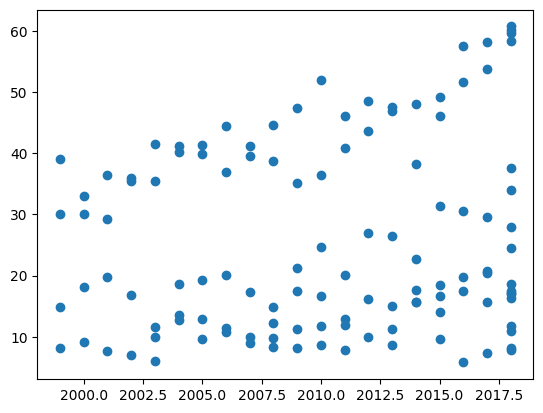

In [5]:
# looking more at data, we wanted to know if it was advisable to use different years' data as inputs to the model
# we decided to include them in the end with the logic that there is natural variance between years, though there is an
# extraneous trend induced as time goes on

from matplotlib import pyplot as plt
x = filtered_data.loc[filtered_data["Race"].isin(["American Indian or Alaska Native"])] 
year = x["YEAR"]
estimate = x["ESTIMATE"]

plt.scatter(year, estimate)

In [6]:
two_stdev = filtered_data["ESTIMATE"].mean() + 2*filtered_data["ESTIMATE"].std()
filtered_data[filtered_data["ESTIMATE"] > two_stdev]

,YEAR,AGE,AGE_NUM,ESTIMATE,Gender,Hispanic,Race,0.5 stdev,1.0 stdev,1.5 stdev,2.0 stdev
4972,2004,15-24 years,2.0,40.2,Male,False,American Indian or Alaska Native,True,True,True,True
4973,2005,15-24 years,2.0,41.3,Male,False,American Indian or Alaska Native,True,True,True,True
4974,2006,15-24 years,2.0,44.4,Male,False,American Indian or Alaska Native,True,True,True,True
4975,2007,15-24 years,2.0,41.2,Male,False,American Indian or Alaska Native,True,True,True,True
4976,2008,15-24 years,2.0,44.6,Male,False,American Indian or Alaska Native,True,True,True,True
4977,2009,15-24 years,2.0,47.3,Male,False,American Indian or Alaska Native,True,True,True,True
4978,2010,15-24 years,2.0,51.9,Male,False,American Indian or Alaska Native,True,True,True,True
4979,2011,15-24 years,2.0,46.1,Male,False,American Indian or Alaska Native,True,True,True,True
4980,2012,15-24 years,2.0,48.5,Male,False,American Indian or Alaska Native,True,True,True,True
4981,2013,15-24 years,2.0,47.5,Male,False,American Indian or Alaska Native,True,True,True,True


In [7]:

filtered_data

,YEAR,AGE,AGE_NUM,ESTIMATE,Gender,Hispanic,Race,0.5 stdev,1.0 stdev,1.5 stdev,2.0 stdev
4966,1999,15-24 years,2.0,39.1,Male,False,American Indian or Alaska Native,True,True,True,False
4967,2000,15-24 years,2.0,33.0,Male,False,American Indian or Alaska Native,True,True,False,False
4968,2001,15-24 years,2.0,29.2,Male,False,American Indian or Alaska Native,True,True,False,False
4969,2005,15-24 years,2.0,18.8,Male,False,White,False,False,False,False
4970,2002,15-24 years,2.0,36.0,Male,False,American Indian or Alaska Native,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
6381,2018,65 years and over,5.0,6.3,Female,False,White,False,False,False,False
6382,2018,15-24 years,2.0,4.2,Female,False,Black or African American,False,False,False,False
6383,2018,25-44 years,3.0,4.5,Female,False,Black or African American,False,False,False,False
6384,2018,45-64 years,4.0,3.1,Female,False,Black or African American,False,False,False,False


In [8]:
filtered_data
pd.get_dummies(filtered_data)

,YEAR,AGE_NUM,ESTIMATE,Hispanic,0.5 stdev,1.0 stdev,1.5 stdev,2.0 stdev,AGE_15-24 years,AGE_25-44 years,...,AGE_75-84 years,AGE_85 years and over,Gender_Female,Gender_Male,Race_American Indian or Alaska Native,Race_Asian,Race_Asian or Pacific Islander,Race_Black or African American,Race_Native Hawaiian or Other Pacific Islander,Race_White
4966,1999,2.0,39.1,False,True,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
4967,2000,2.0,33.0,False,True,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
4968,2001,2.0,29.2,False,True,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
4969,2005,2.0,18.8,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
4970,2002,2.0,36.0,False,True,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6381,2018,5.0,6.3,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
6382,2018,2.0,4.2,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False
6383,2018,3.0,4.5,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
6384,2018,4.0,3.1,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [9]:
# Training various models

from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X = pd.get_dummies(filtered_data).drop(["YEAR", "AGE_NUM", "ESTIMATE", "0.5 stdev", "1.0 stdev", "1.5 stdev", "2.0 stdev"], axis=1, inplace=False)
y = filtered_data["1.0 stdev"]

# X['AGE'] = X['AGE'].astype('category')


params = dict(
    booster=["dart"],
    eta=[0.1, 0.2, 0.3, 0.4, 0.5],
    max_depth=[5, 6, 7, 8],
    subsample=[0.8, 0.9, 1],
    objective=["binary:logistic"],
    colsample_bytree=[0.5, 0.6, 0.7] 
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

xgbc = XGBClassifier()
search = RandomizedSearchCV(xgbc, params, n_iter=10, n_jobs=-1, cv=3)
search.fit(X, y)
search.best_params_

{'subsample': 1,
 'objective': 'binary:logistic',
 'max_depth': 7,
 'eta': 0.5,
 'colsample_bytree': 0.7,
 'booster': 'dart'}

In [10]:
xgbc = XGBClassifier(**search.best_params_)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.5, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [11]:
from sklearn.metrics import roc_auc_score
y_pred = xgbc.predict_proba(X_test)[:,1]
# roc_auc_score(y_test, y_pred)
xgbc.predict_proba(X_test)
xgbc.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, xgbc.predict(X_test))

array([[95,  1],
       [ 4,  7]], dtype=int64)

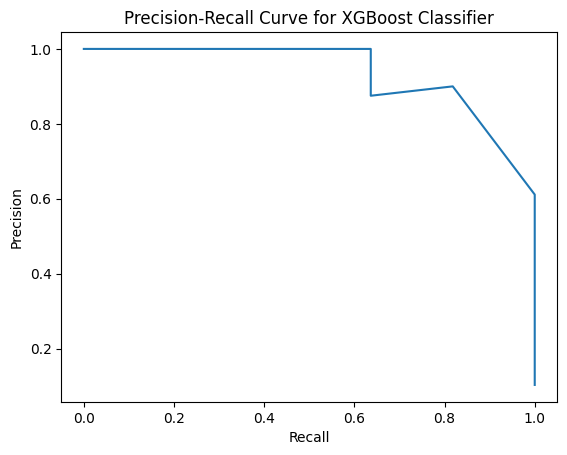

In [30]:
# evaluate using Precision-Recall Curve: 
y_pred = xgbc.predict_proba(X_test)[:,1]
from sklearn.metrics import precision_recall_curve
precision, recall, thresh = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.title("Precision-Recall Curve for XGBoost Classifier")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
confusion_matrix(y_test, lgr.predict(X_test))

array([[87,  9],
       [ 6,  5]], dtype=int64)

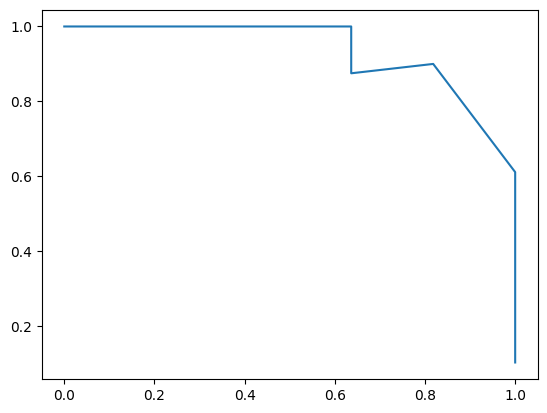

In [20]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresh = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.title("Precision-Recall Curve for XGBoost Classifier")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

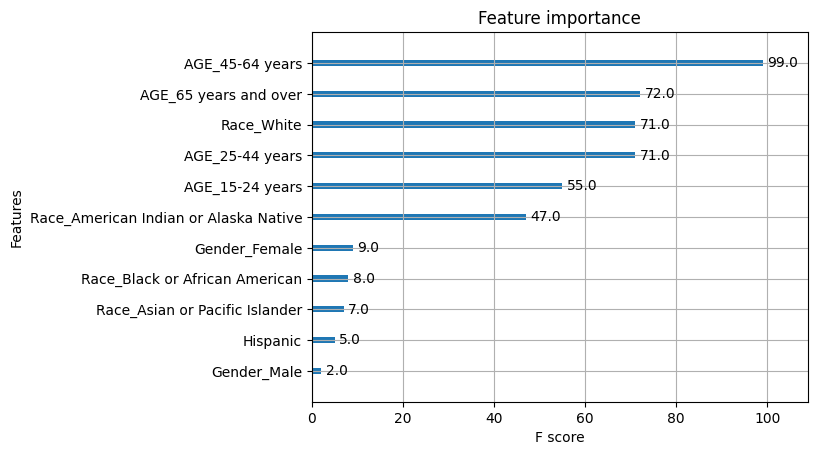

In [15]:
from sklearn.decomposition import PCA
from xgboost import plot_importance
plot_importance(xgbc)

In [16]:
california_data = pd.read_csv(r"C:\Users\ayanc\PycharmProjects\dspfinal\datasets\suicide-lghc-indicator-21.csv")
california_data.drop(["Indicator", "Year", "Numerator", "Denominator", "Age Adjusted Rate"], axis=1, inplace=True)
california_data

,Geography,Strata,Strata Name,Rate
0,CALIFORNIA,Sex,Female,3.993
1,CALIFORNIA,Sex,Male,14.370
2,CALIFORNIA,Sex,Total,9.156
3,CALIFORNIA,Sex,Female,3.950
4,CALIFORNIA,Sex,Male,14.970
...,...,...,...,...
1399,Butte,Sex,Total,18.940
1400,Santa Cruz,Sex,Total,16.400
1401,Sonoma,Sex,Total,13.550
1402,Trinity,Sex,Total,39.510


In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

svmc = SVC()
# svmc.fit(X_train, y_train)

search = GridSearchCV(svmc, param_grid)
search.fit(X, y)
params = search.best_params_

svmc = SVC(**params)
svmc.fit(X_train, y_train)
confusion_matrix(y_test, svmc.predict(X_test))

array([[96,  0],
       [ 5,  6]], dtype=int64)

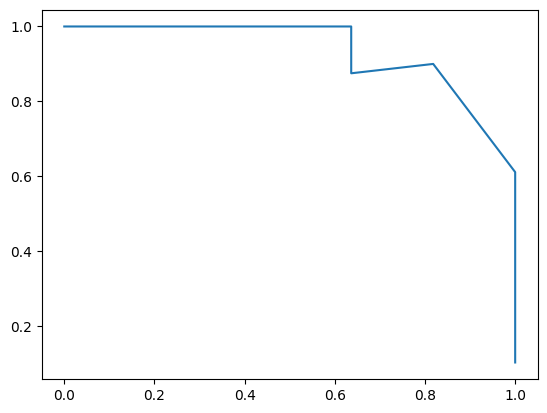

In [28]:
precision, recall, thresh = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)

In [55]:
# finding true positive rate for different classifiers

from sklearn.neighbors import KNeighborsClassifier
import sklearn
import numpy as np
for x in range(3, 8):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train, y_train)
    # print(knn.predict(X_test))
    
    # heavily references https://stackoverflow.com/a/43331484
    confusion_matrix = sklearn.metrics.confusion_matrix(knn.predict(X_test), y_test)
    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = confusion_matrix.sum() - (FP + FN + TP)
    TPR = TP/(TP+FN)
    FNR = FN/(TP+FN)
    print(f"{x} neighbors: TPR:{TPR}")


3 neighbors: TPR:[0.95049505 1.        ]
4 neighbors: TPR:[0.95744681 0.53846154]
5 neighbors: TPR:[0.97826087 0.6       ]
6 neighbors: TPR:[0.97826087 0.6       ]
7 neighbors: TPR:[0.97826087 0.6       ]


In [58]:
# heavily references https://stackoverflow.com/a/43331484
confusion_matrix = sklearn.metrics.confusion_matrix(xgbc.predict(X_test), y_test)
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
TPR = TP/(TP+FN)
FNR = FN/(TP+FN)
print(f"XGBoost TPR:{TPR}")

XGBoost TPR:[0.95959596 0.875     ]


In [60]:
# heavily references https://stackoverflow.com/a/43331484
confusion_matrix = sklearn.metrics.confusion_matrix(svmc.predict(X_test), y_test)
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
TPR = TP/(TP+FN)
FNR = FN/(TP+FN)
print(f"SVMC TPR:{TPR}")

SVMC TPR:[0.95049505 1.        ]


In [64]:
from sklearn.linear_model import LogisticRegression

lgrc = LogisticRegression()
lgrc.fit(X_train, y_train)
# heavily references https://stackoverflow.com/a/43331484
confusion_matrix = sklearn.metrics.confusion_matrix(lgrc.predict(X_test), y_test)
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
TPR = TP/(TP+FN)
FNR = FN/(TP+FN)
print(f"LGRC TPR:{TPR}")

LGRC TPR:[0.93548387 0.35714286]


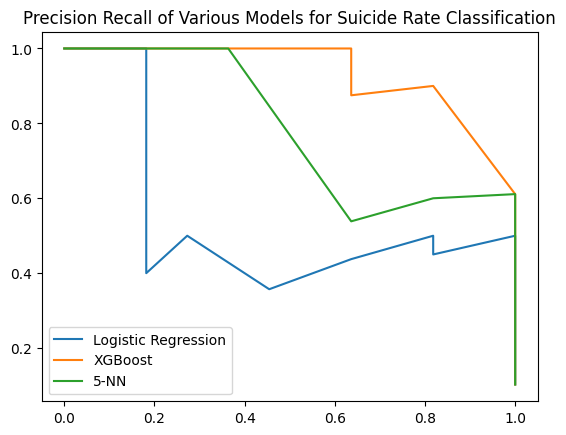

In [67]:
# final Precision-Recall curve for comparison
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
models = [(lgrc, "Logistic Regression"), (xgbc, "XGBoost"), (knn, "5-NN")]

for x in models:
    # https://stackoverflow.com/a/16006929
    y_pred = x[0].predict_proba(X_test)[:,1]
    precision, recall, thresh = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, label=x[1])

plt.legend(loc='best')
plt.title("Precision Recall of Various Models for Suicide Rate Classification")
plt.show()